# El dataset de MNIST

In [12]:
import tensorflow as tf
import numpy as np

from skimage import io

In [5]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [8]:
len(test_images)

10000

In [13]:
im_temp = train_images[0]

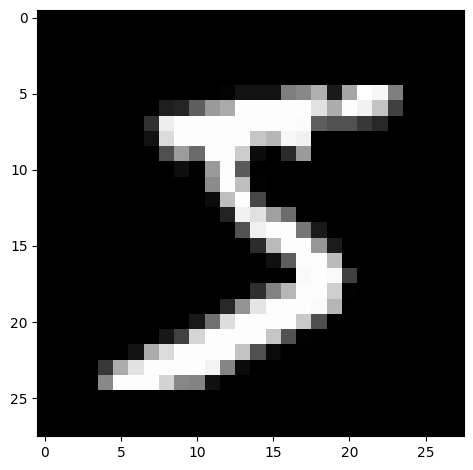

In [15]:
io.imshow(np.reshape(im_temp, (28,28)))

## Una red neuronal con TensorFlow - v1
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión $784$.
* El dataset se puede pensar como 55000 filas y 784 columnas.
* Cada dato del dataset es un número entre 0 y 1.

$$
y = \text{softmax} (Wx+b)
$$

In [20]:
dim_input = 784
n_categories = 10

In [19]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32, [None, 784])

In [21]:
W = tf.Variable(tf.zeros([dim_input, n_categories]))
b = tf.Variable(tf.zeros([n_categories]))

In [22]:
softmax_args = tf.matmul(x, W) + b
y_hat = tf.nn.softmax(softmax_args)

## Entrenando la red neuronal
* Loss: Es la pérdida y el objetivo es minimizarlo.

**Cross entropy:**
$$
H_{y'}(y) = -\sum_{i}y_i\log(\hat{y}_i)
$$

In [23]:
tf.compat.v1.disable_eager_execution()
y_ = tf.compat.v1.placeholder(tf.float32, [None, 10])

In [27]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.math.log(y_hat), axis = [1]))

In [ ]:
# tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

In [28]:
train_step = tf.compat.v1.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [29]:
session = tf.compat.v1.InteractiveSession()

In [31]:
tf.compat.v1.global_variables_initializer().run

<bound method Operation.run of <tf.Operation 'init' type=NoOp>>

In [47]:
len(train_images)

60000

In [61]:
train_images.shape

(60000, 28, 28)

In [84]:
xd = train_images[np.random.choice(range(0,len(train_images)-1), 100, replace = False)]
xd.T.reshape(100,-1).shape

(100, 784)